# <p style="text-align:center;"><u>**Exploratory Data Analysis on Melbourne Housing**</u></p>

#### By: Ken Wilson

## **Overview**

#### Melbourne, Australia's second-largest city, is known for its vibrant cultural scene, diverse population, and beautiful parks. It boasts iconic landmarks like Federation Square and the Royal Botanic Gardens, as well as a thriving coffee culture. Melbourne is famous for its sports passion, hosting events like the Australian Open and Melbourne Cup, making it a dynamic and cosmopolitan destination.

#### Recently, the housing market in Melbourne has seen explosive growth. Let's analyze this data to determine if there are any worthwhile investment opportunities is this market.

## **About the data**

#### The data we have is a collection of info from home sales in Melbourne for the years 2016 & 2017.

#### This data was originally scraped from publicly available results posted every week from Domain.com.au by kaggle.com user Tony Pino. They cleaned it as best as they could and added some column data from other sources.

#### The dataset has since been reduced and provided to me for this specific exercise. I will be using this data as-is to begin this analysis. Further cleaning may be done if a deeper understanding is desired following this initial overview. So far, no data cleaning has been done on my part.

#### These are the given attributes for each record:

| Suburb | Address | Rooms | Type | Price | Method | SellerG | Date | Distance | 
| ------ | ------- | ----- | ----- | --- | ------- | ------- | ---- | ----- | 
| Suburb | Street Address | total # of rooms | house, unit, or townhouse | in AU\$ | property passed in, property sold, property sold prior, sold after auction, vendor bid | Agent Name | Date Sold | Distance from Central Business District in km |



| Postcode | Bedroom2 | Bathroom | Car | Landsize | BuildingArea | YearBuilt | CouncilArea | Regionname | Propertycount |
| ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| Postcode | # of Bedrooms | # of Bathrooms | # of Carspots | in Square Meters | in Square Meters | The year it was built | Governing council | General Region (West, Northwest, North, Northeast …etc) | # of properties that exist in its suburb |

In [1]:
### First, we need to import libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('housing.csv')

***
The following is a peek at some of the data we will be analyzing
***

In [2]:
### look at the 1st 5 rows to get a sense of the data we have
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,house,1035000,property sold,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,house,1465000,property sold prior,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,house,1600000,vendor bid,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,house,1876000,property sold,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,house,1636000,property sold,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,Northern Metropolitan,4019


In [3]:
### look at the general structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6847 non-null   object 
 1   Address        6847 non-null   object 
 2   Rooms          6847 non-null   int64  
 3   Type           6847 non-null   object 
 4   Price          6847 non-null   int64  
 5   Method         6847 non-null   object 
 6   SellerG        6847 non-null   object 
 7   Date           6847 non-null   object 
 8   Distance       6847 non-null   float64
 9   Postcode       6847 non-null   int64  
 10  Bedroom2       6847 non-null   int64  
 11  Bathroom       6847 non-null   int64  
 12  Car            6819 non-null   float64
 13  Landsize       6847 non-null   int64  
 14  BuildingArea   6847 non-null   float64
 15  YearBuilt      6847 non-null   float64
 16  CouncilArea    6187 non-null   object 
 17  Regionname     6847 non-null   object 
 18  Property

***
The next 2 cells set up some variables I will use in displaying many of the following charts
***

In [4]:
###  I want to show the prices in terms of 'millions' in the following charts, so I'm going to add a column where the value is Price divided by 1,000,000
df['PriceInMillions'] = df['Price'] / 1000000

###  I want the ticks on the plots to be evenly spread out by 1 million where I use Price on an axis
###  determine the highest PriceInMillions and record the value rounded down to the nearest 1 million
maximillions = int(df['PriceInMillions'].max() // 1)

###  Create a list of tick marks from 0 to the highest million equally spaced by 1 million (+ 1 million for visuals)
###  I'll use this list for the tick marks wherever Price in Millions is used in the following plots
millions_ticks = np.linspace(0, maximillions + 1, maximillions + 2)

In [5]:
###  I want to eventually group the homes by the decade in which they were built, so I'm going to add a column where the value is the year built rounded DOWN to the nearest 10s (eg. 1980, 1990, 2000)
df['DecadeBuilt'] = ((df['YearBuilt'] // 10) * 10).astype(int)

###  I want the ticks on the plots to be evenly spread out by 10 years where I use YearBuilt on an axis
###  find the range of years by decade to include as the tick marks
min_year = df['DecadeBuilt'].min()
max_year = df['DecadeBuilt'].max()
buckets_count = int((max_year - min_year) / 10)

###  Create a list of tick marks from the earliest decade through the latest decade (+ 1 decade for visuals)
###  I'll use this list for the tick marks wherever Build years is used in the following plots
decades_ticks = np.linspace(min_year, max_year + 10, buckets_count + 2).astype(int)


***
### Now, let's start analyzing...
***

## **<u>The relationships between home type, land size, and price</u>**

### Below is a scatter plot with a point for every entry with land size on the x-axis, price on the y-axis, and the home types represented by colors.
Note:  Prices are in Australian Dollars and Land Size is in sq. Meters.

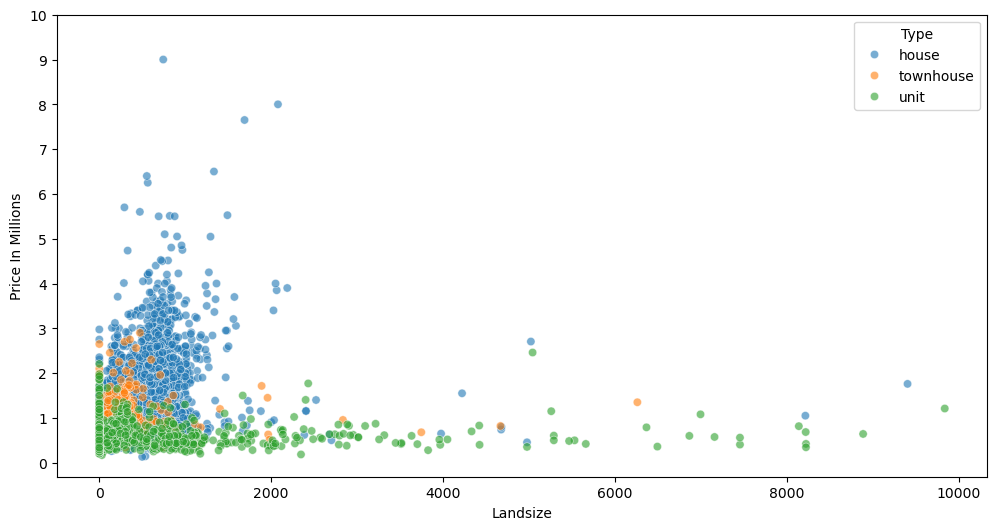

In [6]:
###  scatter plot that shows land size on the x-axis, price on the y-axis, and the point colors reflect the type of the property
plt.figure(figsize = (12,6))
sns.scatterplot(data = df[['Landsize', 'PriceInMillions', 'Type']].sort_values('Type'), x = 'Landsize', y = 'PriceInMillions', hue = 'Type', alpha = 0.6).set(ylabel = 'Price In Millions')
plt.yticks(millions_ticks)
plt.show()


### **<u>Houses</u>** (shown in blue)
### Houses with more land seem to bring in higher prices.

### **<u>Units</u>** (shown in green)
### Land size doesn't seem to affect the price of homes classified as Units much.

### **<u>Townhouses</u>** (shown in orange)
### A lot of the scatter plot points for Townhouses are hidden by the points from other home types.
### The pie chart below illustrates proportionally how many more Houses and Units were sold compared to Townhouses.

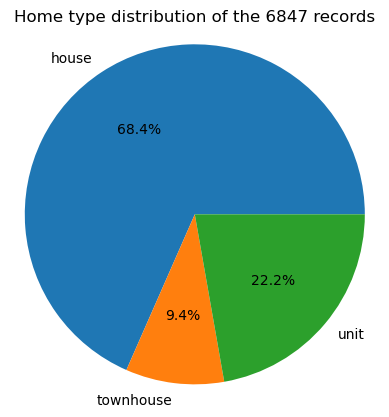


641 entries were Townhouses.




In [17]:
### pie chart showing the distribution  of home types
plt.pie(data = df.groupby('Type', as_index=False).agg({'YearBuilt': 'count'}).rename(columns = {'YearBuilt' : 'Count'}).sort_values('Type'), x = 'Count', autopct='%1.1f%%', labels='Type', radius = 1.15)
df.groupby('Type').agg({'YearBuilt': 'count'})
plt.title('Home type distribution of the ' + str(df.shape[0]) + ' records')
plt.show()

print('\n' + str(len(df[df['Type'] == 'townhouse'])) + ' entries were Townhouses.\n\n')


### Let's try to get a better look at price and land size data on Townhouses.
### Below is the same scatter plot with Houses and Units hidden so that we get a better view the data on Townhouses.

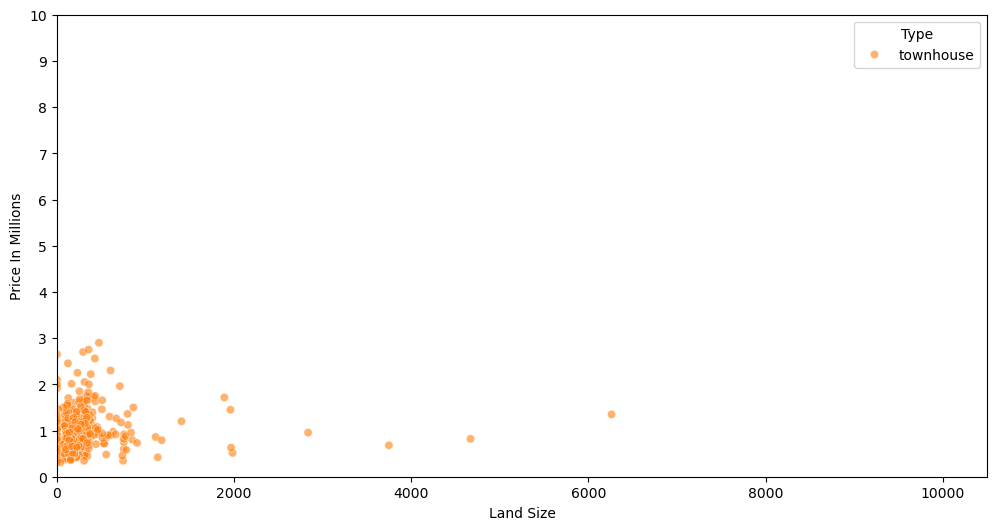

In [8]:
### scatter plot that shows land size on the x-axis and price on the y-axis, but this one only shows townhouses
plt.figure(figsize = (12,6))
sns.scatterplot(data = (df[df['Type'] == 'townhouse'])[['Landsize', 'PriceInMillions', 'Type']], x = 'Landsize', y = 'PriceInMillions', hue = 'Type', alpha = 0.6, palette = ['#ff7f0e']).set(ylabel = 'Price In Millions', xlabel = 'Land Size')
plt.yticks(millions_ticks)
plt.xlim(0, 10500)
plt.show()

### Land size appears to increase the price of <u>Townhouses</u> a little bit up to a point.
* ### Properties larger than 500 - 700 sq. meters don't seem to bring up the price so much.
* ### There are only a few outliers where Townhouses are found on relatively larger plots of land.
### <u>**Discovery:**  Land price goes up the most when there is a **House** on it.</u>

***

***

## **<u>The impact of the year in which the home was built on price</u>**

### Below is a line chart that shows the year built along the x-axis and the average price per build year on the y-axis.
Note:  Prices are in Australian Dollars.

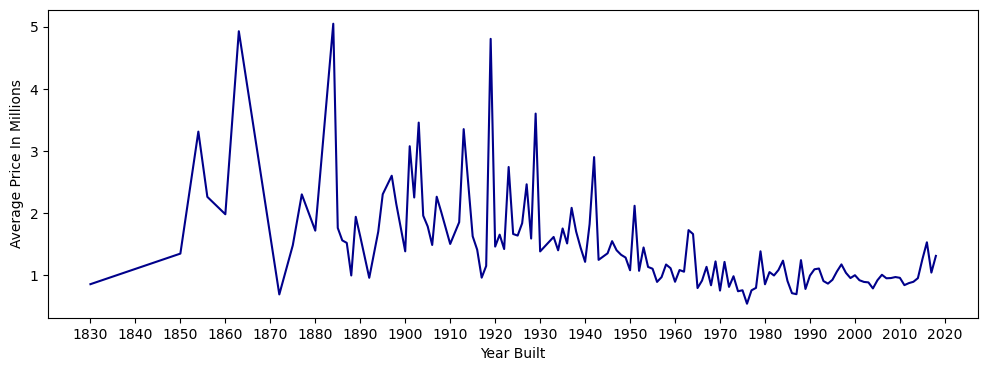

In [9]:
###   a line chart that shows the year built along the x-axis and the average price per year on the y-axis
plt.figure(figsize = (12,4))
sns.lineplot(x= 'YearBuilt', y = 'AveragePriceInMillions', data = df[['YearBuilt', 'PriceInMillions']].groupby('YearBuilt', as_index=False).agg(AveragePriceInMillions = ('PriceInMillions' , 'mean')).sort_values('YearBuilt'), color = 'darkblue').set(ylabel = 'Average Price In Millions', xlabel = 'Year Built')
plt.xticks(decades_ticks)
plt.show()


### The line here varies widely from year to year on average prices, especially in the fist 100 years shown on the graph. We can see a general trend toward lower prices as the homes get newer and newer.

### Let's look at how the build years are distributed in this data. Below is a histogram of the build years in this dataset.

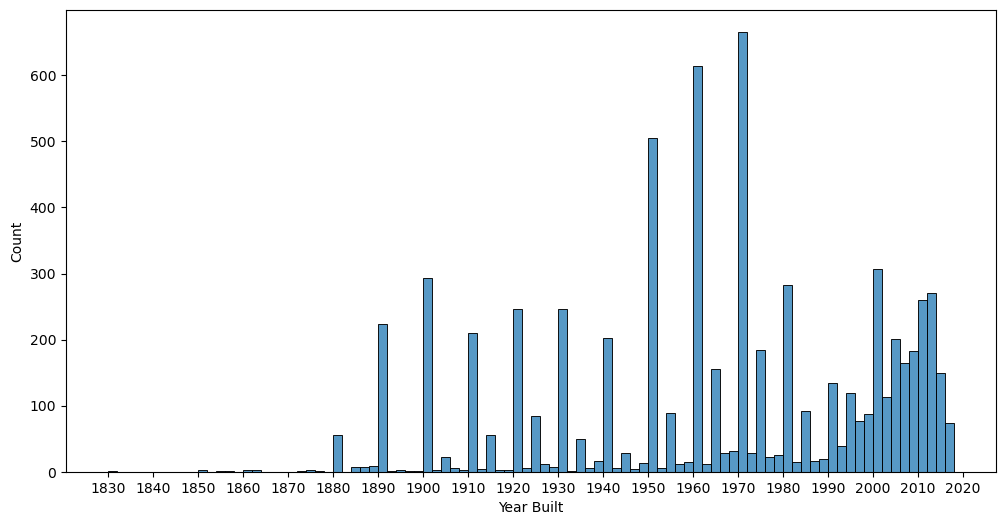

In [10]:
###  a histogram of the build years
plt.figure(figsize = (12,6))
sns.histplot(x = 'YearBuilt', data = df[['YearBuilt','Type']], bins = 94).set(xlabel = 'Year Built')
plt.xticks(decades_ticks)
plt.show()

### The sample numbers from year to year vary quite a bit.
### Let's group the build years into <u>decades</u> and then average the prices to see if we can get a line chart that is less dramatic.

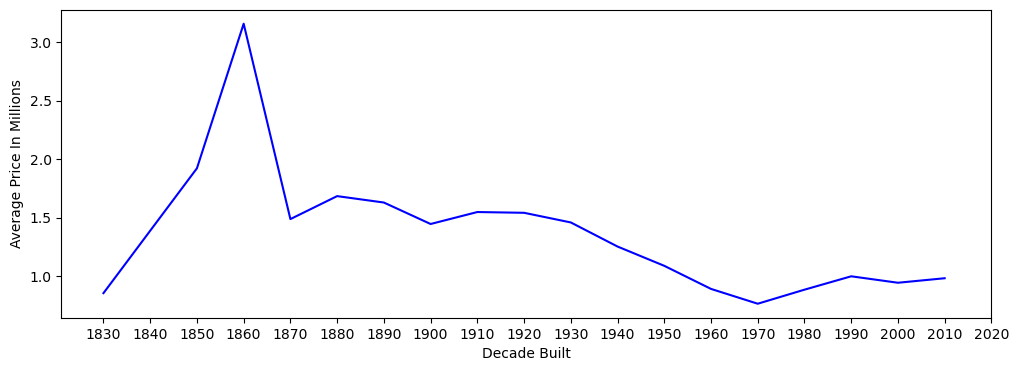

In [11]:
###   a line chart that shows the decade built along the x-axis and the average price per decade on the y-axis
plt.figure(figsize = (12,4))
sns.lineplot(x= 'DecadeBuilt', y = 'AveragePriceInMillions', data = df[['DecadeBuilt', 'PriceInMillions']].groupby('DecadeBuilt', as_index=False).agg(AveragePriceInMillions = ('PriceInMillions' , 'mean')).sort_values('DecadeBuilt'), color = 'blue').set(ylabel = 'Average Price In Millions', xlabel = 'Decade Built')
plt.xticks(decades_ticks)
plt.show()

### This new chart shows this trend line a bit more clearly having the homes grouped into 10 year spans.
### We can see a general trend toward lower prices as the homes get newer up until the 1970s. After the 1970s builds, the prices may be trending a little upward for newer homes.

### This is what the histogram looks like when build years are grouped into decades.

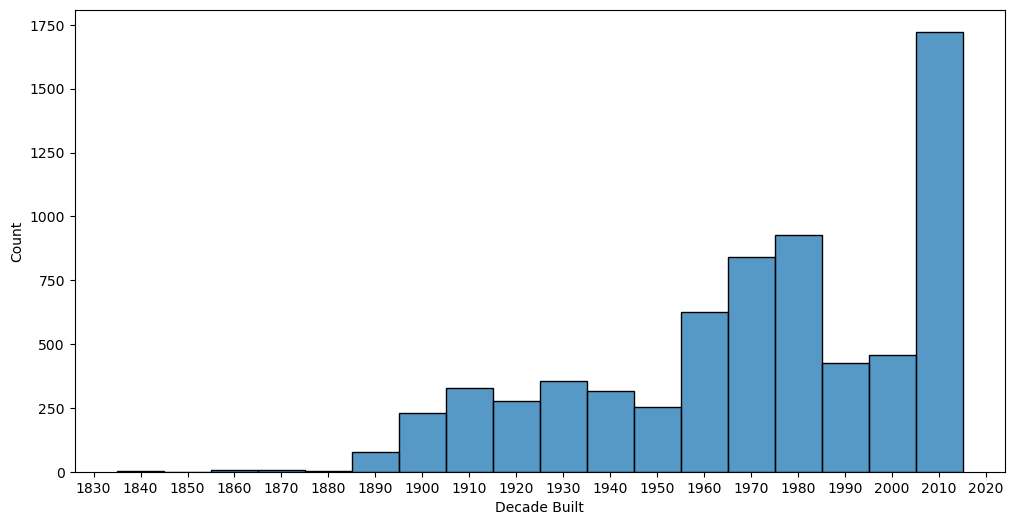

In [12]:
###  A histogram of the build decades
plt.figure(figsize = (12,6))
sns.histplot(df['DecadeBuilt'] + 5, bins = len(decades_ticks) - 2).set(xlabel = 'Decade Built')
plt.xticks(decades_ticks)
plt.show()

### The histogram above shows that the sample sizes of the decades in which the homes were built are less dramatic than the individual yearly samples.
### Most of the homes sold in Melbourne in 2016 & 2017 were built in the 2010s.

### The line chart above suggests that homes built in the 1860s bring an average price of over \$3 million, but the histogram shows us that the sample size from which the average was calculated was very small for that decade.
### I wonder if there's a significant outlier in a small sample size. Let's see what those records look like.

In [13]:
display(df[df['DecadeBuilt'] == 1860])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,PriceInMillions,DecadeBuilt
2590,Port Melbourne,175 Stokes St,3,house,2200000,property sold,Greg,3/12/2016,3.8,3207,...,2,0.0,250,280.00,1863.0,Port Phillip,Southern Metropolitan,8648,2.20,1860
3032,South Melbourne,315 Moray St,4,house,2180000,property sold,Marshall,10/12/2016,2.1,3205,...,3,1.0,200,153.00,1860.0,Port Phillip,Southern Metropolitan,5943,2.18,1860
4501,Carlton,2/100 Keppel St,2,townhouse,960000,vendor bid,Nelson,20/05/2017,1.8,3053,...,2,1.0,0,90.00,1860.0,Melbourne,Northern Metropolitan,6786,0.96,1860
4959,Hawthorn,49 Lisson Gr,4,house,7650000,property sold,Abercromby's,17/06/2017,5.3,3122,...,2,4.0,1690,284.00,1863.0,Boroondara,Southern Metropolitan,11308,7.65,1860
5836,South Melbourne,26 Bridport St,3,house,2800000,vendor bid,Greg,15/07/2017,1.9,3205,...,2,2.0,216,193.74,1860.0,Port Phillip,Southern Metropolitan,5943,2.80,1860


### Interesting! One house built in the suburb of Hawthorn in 1863 sold for \$7.65 million. That is significantly more than the other 4 in this sample of 5 homes built in the 1860s.
### <u>**Discovery:**  For Houses sold in Melbourne in 2016-2017, on average, Houses built ~70 years or more prior fetched a higher sales price.</u>

***

***

## **<u>The impact of the region of Melbourne on a home's price</u>**

### Below is a bar chart that shows the region on the x-axis and the average price of the property on the y-axis.
Note:  Prices are in Australian Dollars.


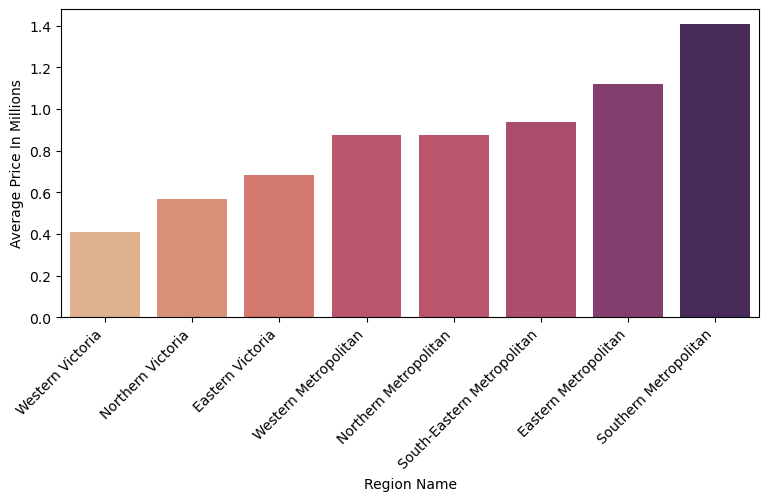

In [14]:
###   bar chart that shows the region on the x-axis and the average price of the property on the y-axis
# df_region_average_price = df[['Regionname', 'PriceInMillions']].groupby('Regionname').agg(AveragePriceInMillions = ('PriceInMillions' , 'mean')).sort_values('AveragePriceInMillions')

plt.figure(figsize = (9,4))
sns.barplot(x = 'Regionname', y = 'AveragePriceInMillions', data = df[['Regionname', 'PriceInMillions']].groupby('Regionname').agg(AveragePriceInMillions = ('PriceInMillions' , 'mean')).sort_values('AveragePriceInMillions'), palette = 'flare', hue = 'AveragePriceInMillions', legend = False).set(ylabel = 'Average Price In Millions', xlabel = 'Region Name')
plt.xticks(rotation=45, ha='right')
plt.show()


### <u>**Discovery:**  On average, **Southern Metropolitan** is the region of Melbourne where home prices were the highest</u>.
* ### \$1.4 million was the average price in the Southern Metropolitan region!
#### Western Victoria, on the other hand, had a much lower average sale price. \$400,000.

***

***

## **<u>The distribution of home prices</u>**

### Below is a histogram of the property prices.

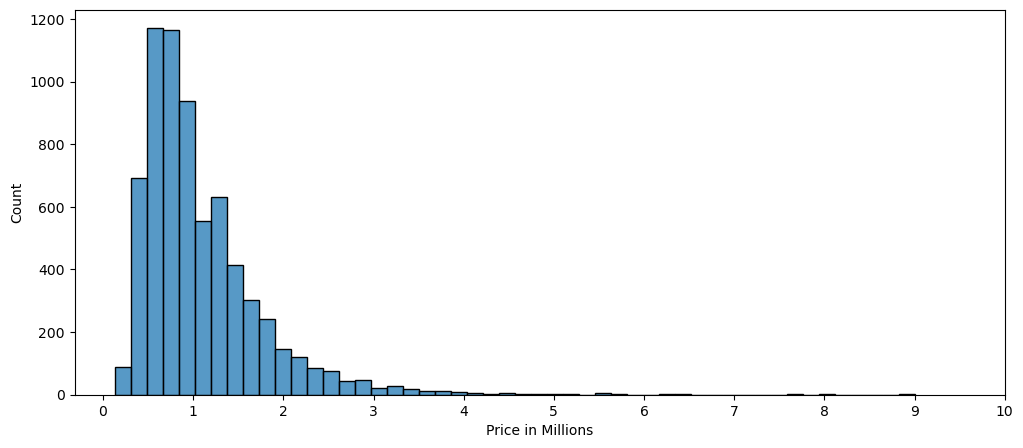

In [15]:
###  a histogram of property prices
plt.figure(figsize = (12,5))
sns.histplot(data = df['PriceInMillions'], bins = 50).set(xlabel = 'Price in Millions')
plt.xticks(millions_ticks)
plt.show()

### <u>**Discovery:** The prices for these properties are **right skewed**</u>.
* #### The bulk of the home prices were between a half-million & 2 million Australian dollars.
* #### Only a small number of homes sold for more than \$3 million.

***

***

## **<u>The variety of home ages in each region of Melbourne</u>**

#### Below is a box plot that shows the years that each property was built on the x-axis and the region on the y-axis.

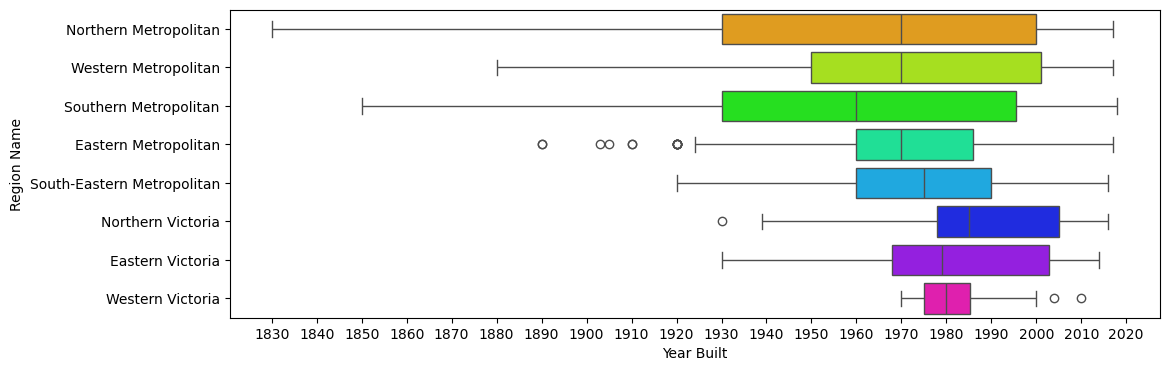

In [16]:
###  a box plot that shows the years that each property was built on the x-axis and the region on the y-axis, oriented horizontally
plt.figure(figsize = (12,4))
sns.boxplot(x = 'YearBuilt', y = 'Regionname', data = df[['Regionname', 'YearBuilt']], hue = 'Regionname', palette = 'hsv').set(xlabel = 'Year Built', ylabel = 'Region Name')
plt.xticks(decades_ticks)
plt.show()


#### Overall, it looks like the bulk of the homes in Melbourne were built in the late 1900s.

### <u>**Discoveries:**</u> 
* ### The region of Melbourne that had the widest range of home ages is <u>**Northern Metropolitan**</u>
* ### The only region that has very few properties listed that were built after the year 2000 is <u>**Western Victoria**</u>. This region seems to have nearly all of its homes built between 1970 and 2000.

___

## **<u>Conclusion</u>**

### If you're interested in making a **<u>LARGE investment</u>** into Melbourne's housing market, look into properties having:
* ### A **House** with a moderately **large** property.
* ### A **House** built prior to the **1960s**.
* ### A location in the **Southern Metropolitan** region.

### If you're interested in making a **<u>SMALL investment</u>** into Melbourne's housing market, look into properties having:
* ### A **Unit** with any sized property.
* ### A **Unit** built in or around the **1970s**.
* ### A location in the **Western Victorian** region.